In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fast')
# just open the file
df1 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ori3/20160111/20160111_flat.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ori3/20160304/20160304_flat.csv')
df3 = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/Data/P5ori3/20160305/20160305_flat.csv')
df = pd.concat([df1, df2, df3])
images_dir = '/content/drive/MyDrive/ColabNotebooks/Project/Plots/P5ori'
df['AddedVolume'] = df.apply(lambda x: abs(x['V1'] - x['V0']),axis=1)


# **Data Analysis**

## Interdivision Time

Interdivision time max: 62.62440215555561
tau max: Series([], Name: t1Trans, dtype: object)
tau before: 1641    51.911573
Name: Rolling Average, dtype: float64
tau after: 12119    38.125044
Name: Rolling Average, dtype: float64


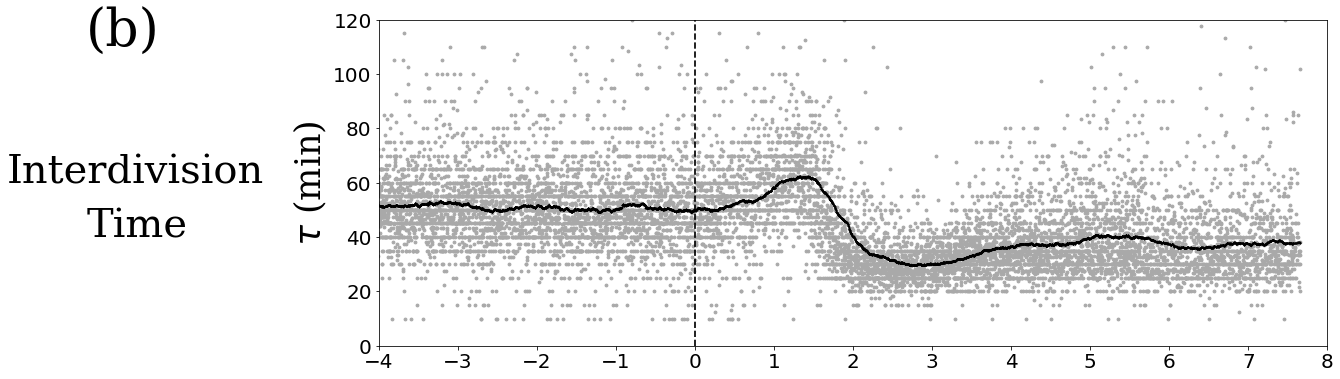

In [ ]:
InterdivisionT = df[['fov', 't1Trans', 'divT']]
InterdivisionT_Plot = InterdivisionT.pivot_table('divT', index='t1Trans', columns='fov', aggfunc='mean',margins=True)
InterdivisionT_Plot = InterdivisionT_Plot.fillna(0)
InterdivisionT_Plot = InterdivisionT_Plot['All']
InterdivisionT_Plot = pd.DataFrame(InterdivisionT_Plot)
InterdivisionT_Plot= InterdivisionT_Plot.reset_index(['t1Trans'])
InterdivisionT_Plot= InterdivisionT_Plot[:-1]
#Rolling average
InterdivisionT_Plot['Rolling Average']= InterdivisionT_Plot['All'].rolling(300, min_periods=1).mean()

#Peak 
print('Interdivision time max: ' + str(InterdivisionT_Plot['Rolling Average'].max()))
t= InterdivisionT_Plot.loc[InterdivisionT_Plot['Rolling Average'] == 67.80265830377795]
print('tau max: ' + str(t['t1Trans']))

#Approximate constant value before the shift
t_before= InterdivisionT_Plot.loc[InterdivisionT_Plot['t1Trans'] == -254.9]
print('tau before: ' + str(t_before['Rolling Average']))

#Approximate constant value after the shift
t_after= InterdivisionT_Plot.loc[InterdivisionT_Plot['t1Trans'] == 355.1]
print('tau after: ' + str(t_after['Rolling Average']))

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=500,color='k',  ls='--',lw = 1.7)
plt.scatter(InterdivisionT_Plot['t1Trans']/60, InterdivisionT_Plot['All'], s=8, color='darkgray')
plt.plot(InterdivisionT_Plot['t1Trans']/60, InterdivisionT_Plot['Rolling Average'], '.', color='k', markersize=1.1)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 30)
plt.ylabel(r'$\tau$ (min)', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(0,120)
plt.text(-8.7, 60, r'Interdivision',family="serif", fontsize=40)
plt.text(-7.7, 40, r'Time',family="serif", fontsize=40)
plt.text(-7.7, 110, r'(b)',family="serif", fontsize=52)
plt.savefig(f"{images_dir}/InterdivisionTimeP5ori.png", bbox_inches="tight", dpi=300)

## **Added Volume**

Added Volume max: 2.5229291195416663
tau max: 7555    92
Name: t1Trans, dtype: object
tau before: 1641    1.342242
Name: Rolling Average, dtype: float64
tau after: 12119    1.628523
Name: Rolling Average, dtype: float64


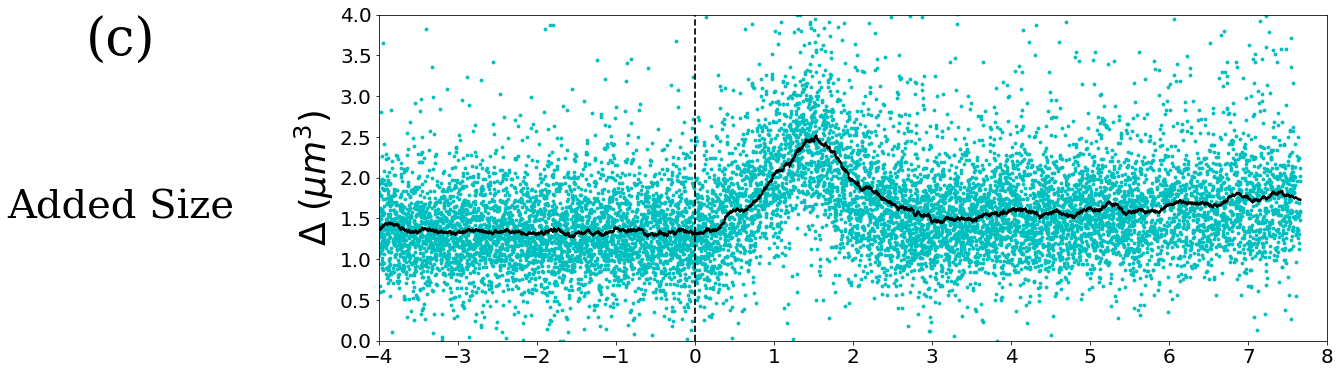

In [ ]:
AddedVolume = df[['fov', 't1Trans', 'AddedVolume']]
#AddedVolume = df[['fov', 't1Trans']]
#AddedVolume['AddedVolume'] = df.apply(lambda x: x['V0']*(np.exp(x['expfitBV2']*x['divT'])-1) - 0.1, axis = 1)
AddedVolume_Plot = AddedVolume.pivot_table('AddedVolume', index='t1Trans', columns='fov', aggfunc='mean',margins=True)
AddedVolume_Plot = AddedVolume_Plot.fillna(0)
AddedVolume_Plot = AddedVolume_Plot['All']
AddedVolume_Plot = pd.DataFrame(AddedVolume_Plot)
AddedVolume_Plot = AddedVolume_Plot.reset_index()
AddedVolume_Plot = AddedVolume_Plot[:-1]

#Rolling average
AddedVolume_Plot['Rolling Average']= AddedVolume_Plot['All'].rolling(200, min_periods=1).mean()

#Peak 
print('Added Volume max: ' + str(AddedVolume_Plot['Rolling Average'].max()))
t= AddedVolume_Plot.loc[AddedVolume_Plot['Rolling Average'] == AddedVolume_Plot['Rolling Average'].max()]
print('tau max: ' + str(t['t1Trans']))

#Approximate constant value before the shift
t_before= AddedVolume_Plot.loc[AddedVolume_Plot['t1Trans'] == -254.9]
print('tau before: ' + str(t_before['Rolling Average']))

#Approximate constant value after the shift
t_after= AddedVolume_Plot.loc[AddedVolume_Plot['t1Trans'] == 355.1]
print('tau after: ' + str(t_after['Rolling Average']))

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=6,color='k',  ls='--',lw = 1.7)
plt.scatter(AddedVolume_Plot['t1Trans']/60, AddedVolume_Plot['All'], color='c', s= 8)
plt.plot(AddedVolume_Plot['t1Trans']/60, AddedVolume_Plot['Rolling Average'], '.', color='k', markersize=1.1)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\Delta~(\mu m^3)$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(0,4)
plt.text(-8.7, 1.5, r'Added Size',family="serif", fontsize=40)
plt.text(-7.7, 3.5, r'(c)',family="serif", fontsize=52)
plt.savefig(f"{images_dir}/AddedVolumenP5ori.png", bbox_inches="tight", dpi=300)

## **Added to initial Volume**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Added Volume max: 1.7363770373961598
tau max: 7556    92.0167
Name: t1Trans, dtype: object
tau before: 1641    1.014782
Name: Rolling Average, dtype: float64
tau after: 12119    0.965999
Name: Rolling Average, dtype: float64


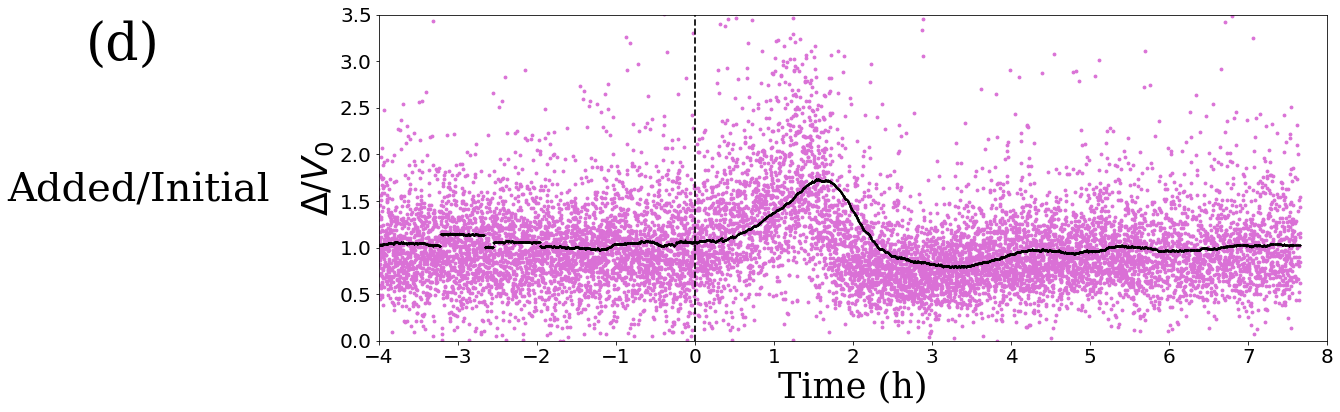

In [ ]:
AddedVolume_IniVolum1 = df[['fov', 't1Trans']]
AddedVolume_IniVolum1['AddedVolume to Initial'] = df.apply(lambda x: abs(x['AddedVolume'])/x['V0'], axis=1)
AddedVolume_IniVolum_Plot1 = AddedVolume_IniVolum1.pivot_table('AddedVolume to Initial', index='t1Trans', columns='fov', aggfunc='mean',margins=True)
AddedVolume_IniVolum_Plot1 = AddedVolume_IniVolum_Plot1.fillna(0)
AddedVolume_IniVolum_Plot1 = AddedVolume_IniVolum_Plot1['All']
AddedVolume_IniVolum_Plot1 = pd.DataFrame(AddedVolume_IniVolum_Plot1)
AddedVolume_IniVolum_Plot1 = AddedVolume_IniVolum_Plot1.reset_index()
AddedVolume_IniVolum_Plot1 = AddedVolume_IniVolum_Plot1[:-1]

#Rolling average
AddedVolume_IniVolum_Plot1['Rolling Average']= AddedVolume_IniVolum_Plot1['All'].rolling(600, min_periods=1).mean()

#Peak 
print('Added Volume max: ' + str(AddedVolume_IniVolum_Plot1['Rolling Average'].max()))
t= AddedVolume_IniVolum_Plot1.loc[AddedVolume_IniVolum_Plot1['Rolling Average'] == AddedVolume_IniVolum_Plot1['Rolling Average'].max()]
print('tau max: ' + str(t['t1Trans']))

#Approximate constant value before the shift
t_before= AddedVolume_IniVolum_Plot1.loc[AddedVolume_IniVolum_Plot1['t1Trans'] == -254.9]
print('tau before: ' + str(t_before['Rolling Average']))

#Approximate constant value after the shift
t_after= AddedVolume_IniVolum_Plot1.loc[AddedVolume_IniVolum_Plot1['t1Trans'] == 355.1]
print('tau after: ' + str(t_after['Rolling Average']))

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=6,color='k',  ls='--',lw = 1.7)
plt.scatter(AddedVolume_IniVolum_Plot1['t1Trans']/60, AddedVolume_IniVolum_Plot1['All'],s=8, color='orchid')
plt.plot(AddedVolume_IniVolum_Plot1['t1Trans']/60, AddedVolume_IniVolum_Plot1['Rolling Average'], '.', color='k', markersize=1.1)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\Delta /V_0$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(0,3.5)
plt.text(-8.7, 1.5, r'Added/Initial',family="serif", fontsize=40)
plt.text(-7.7, 3, r'(d)',family="serif", fontsize=52)
plt.savefig(f"{images_dir}/AddedToInitialVolumenP5ori.png", bbox_inches="tight", dpi=300)

## **Growth rate**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


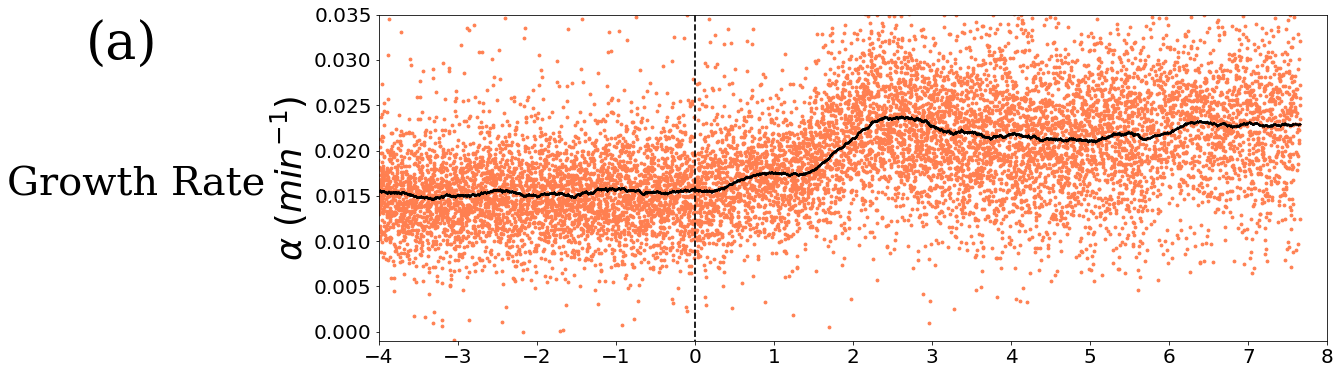

In [ ]:
GrowthRate = df[['fov', 't1Trans','expfitBV2']]
GrowthRate['t1Trans'] = GrowthRate['t1Trans']
GrowthRate_Plot = GrowthRate.pivot_table('expfitBV2', index='t1Trans', columns='fov', aggfunc='mean',margins=True)
GrowthRate_Plot = GrowthRate_Plot.fillna(0)
GrowthRate_Plot = GrowthRate_Plot['All']
GrowthRate_Plot = pd.DataFrame(GrowthRate_Plot)
GrowthRate_Plot = GrowthRate_Plot.reset_index()
GrowthRate_Plot = GrowthRate_Plot[:-1]

#Rolling average
GrowthRate_Plot['Rolling Average']= GrowthRate_Plot['All'].rolling(400, min_periods=1).mean()

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=-1, ymax=0.04,color='k',  ls='--',lw = 1.7)
plt.scatter(GrowthRate_Plot['t1Trans']/60, GrowthRate_Plot['All'], s=8, color='coral')
plt.plot(GrowthRate_Plot['t1Trans']/60, GrowthRate_Plot['Rolling Average'], '.', color='k', markersize=1.1)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\alpha ~(min^{-1})$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(-0.001,0.035)
plt.text(-8.7, 0.015, r'Growth Rate ',family="serif", fontsize=40)
plt.text(-7.7, 0.03, r'(a)',family="serif", fontsize=52)
plt.savefig(f"{images_dir}/GrowthRateP5ori.png", bbox_inches="tight", dpi=300 )

## Zeta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

-0.1012643749115367


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


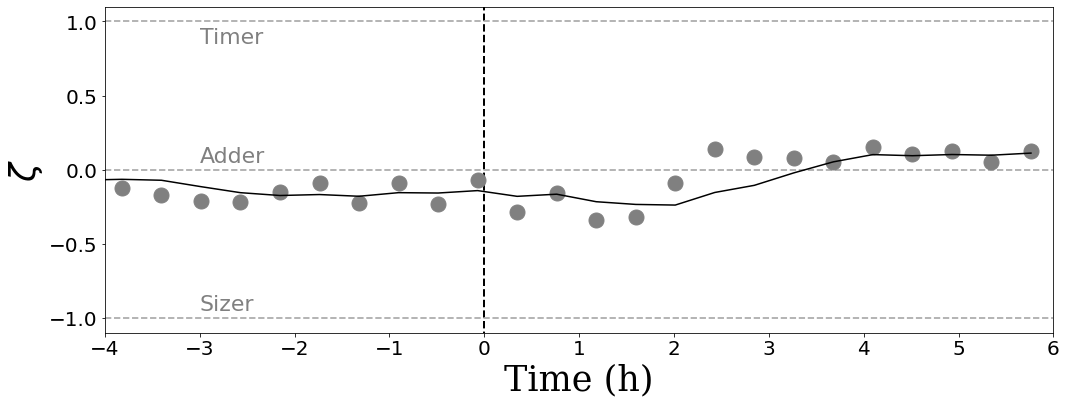

In [ ]:
#Fitting function
def func(x, a, b):
    return a*x+b
import numpy as np
from scipy.optimize import curve_fit
zeta = np.array([])
t = df['t1Trans'].min()
initialGuess = [1,1]
increment = 1000/40
iterations = 1000/increment
for i in range(int(iterations)-10):
  zeta_t = df[(df['t1Trans']>t) & (df['t1Trans']<(t+increment))]
  Division_Control = zeta_t[['fov','t1Trans','V0']]
  Division_Control['AddedVolume'] = zeta_t.apply(lambda x: (x['V1'] - x['V0']), axis=1)
  Division_Control_Plot = Division_Control.pivot_table('AddedVolume', index='fov', columns='V0', aggfunc='mean',margins=True)
  Division_Control_Plot = Division_Control_Plot.fillna(0)
  D= Division_Control_Plot.reset_index()
  D= D.iloc[-1: ].T
  D= D.drop(index='All')
  D= D.reset_index(['V0'])
  l = len(Division_Control_Plot)-1
  D= D[1:]
  popt1, pcov1 = curve_fit(func, D['V0'], D[l], initialGuess)
  popt1 =np.append(popt1,[t], axis =0)
  zeta = np.append(zeta,popt1, axis = 0) 
  t = t + increment

zeta = pd.DataFrame(zeta.reshape(int(iterations)-10,3))
rolling = zeta[0].rolling(5, min_periods=1).mean()

import numpy as np
print(rolling.mean())
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=-1.5, ymax=1.5,color='k',  ls='--',lw = 2)
ax.hlines(1, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
ax.hlines(-1, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
ax.hlines(0, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\zeta$', family="serif", fontsize = 35)
plt.plot(zeta[2]/60, zeta[0], '.',color = 'gray',marker= 'o', markersize= 15,markerfacecolor="gray",alpha = 1, ms=12)
plt.plot(zeta[2]/60, rolling, color = 'k',lw = 1.5)
plt.text(-3, 0.85, r'Timer', fontsize=22, color='gray')
plt.text(-3, 0.05, r'Adder', fontsize=22, color='gray')
plt.text(-3, -0.95, r'Sizer', fontsize=22, color='gray')
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ylim(-1.1,1.1)
plt.xlim(-4,6)
#plt.title('Volume', family = 'serif', fontsize = 40)
plt.savefig(f"{images_dir}/ZetaControlPlotP5ori.png",bbox_inches="tight", dpi=300)

# **Fixing with the model**

In [ ]:
data_model = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Project/AccumulatorModel/sim_pos_P5ori.dat',sep=',')
data_model = pd.DataFrame(data_model)
#Otherwise the RAM will die
data_model= data_model[0:15914]
data_model['divT'] = data_model.apply(lambda x: abs(x['t'] - x['t0']), axis=1)
#data_model['Growth_rate'] = data_model.apply(lambda x: abs(x['xf'] - x['x0'])/(x['xf']*abs(x['t'] - x['t0'])), axis=1)
data_model['Added_size'] = data_model.apply(lambda x: abs(x['xf'] - x['x0']), axis=1)

#Directorio
images_dir_model = '/content/drive/MyDrive/ColabNotebooks/Project/AccumulatorModel'

## **Interdivision time**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


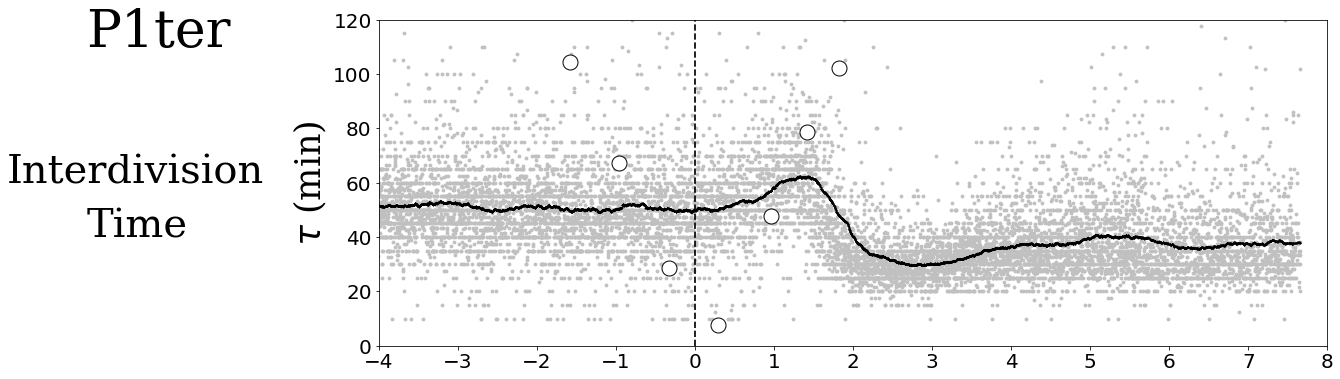

In [ ]:
InterdivisionT_model = data_model[['cell', 't', 'divT']]
InterdivisionT_Plot_model = InterdivisionT_model.pivot_table('divT', index='t', columns='cell', aggfunc='mean',margins=True)
InterdivisionT_Plot_model = InterdivisionT_Plot_model.fillna(0)

InterdivisionT_Plot_model = InterdivisionT_Plot_model['All']
InterdivisionT_Plot_model = pd.DataFrame(InterdivisionT_Plot_model)
InterdivisionT_Plot_model = InterdivisionT_Plot_model.reset_index(['t'])
InterdivisionT_Plot_model = InterdivisionT_Plot_model[:-1]

#Rolling average
InterdivisionT_Plot_model['Rolling average'] = InterdivisionT_Plot_model['All'].rolling(100, min_periods=1).mean()

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=500,color='k',  ls='--',lw = 1.7)
plt.scatter(InterdivisionT_Plot['t1Trans']/60, InterdivisionT_Plot['All'], s=8, color='silver')
plt.plot(InterdivisionT_Plot['t1Trans']/60, InterdivisionT_Plot['Rolling Average'], '.', color='k', markersize=1.1)
plt.plot(InterdivisionT_Plot_model['t']/60, InterdivisionT_Plot_model['Rolling average'], ls=" ", color="k",marker= 'o', markersize= 15,markerfacecolor="w", alpha=0.99,ms=10,markevery=300)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\tau$ (min)', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.text(-8.7, 60, r'Interdivision',family="serif", fontsize=40)
plt.text(-7.7, 40, r'Time',family="serif", fontsize=40)
plt.text(-7.7, 110, r'P1ter',family="serif", fontsize=52)
plt.xlim(-4,8)
plt.ylim(0,120)
plt.savefig(f"{images_dir_model}/InterdivisionTimeModelP5ori.png", bbox_inches = "tight", dpi=300)

## **Added size**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


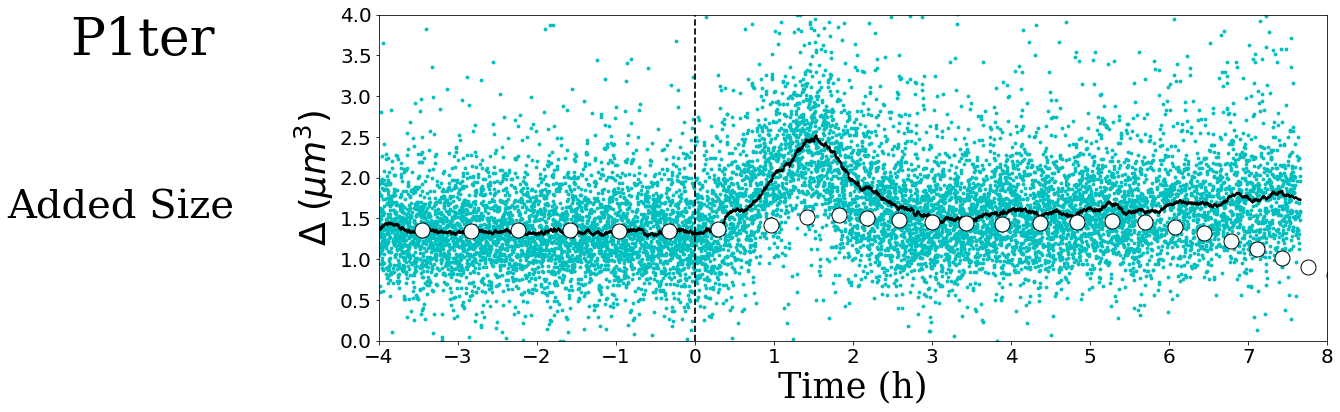

In [ ]:
AddedVolume_model = data_model[['cell', 't']]
AddedVolume_model['Added_size'] = data_model.apply(lambda x: abs(x['xf'] - x['x0']),axis=1)
AddedVolume_Plot_model = AddedVolume_model.pivot_table('Added_size', index='t', columns='cell', aggfunc='mean',margins=True)
AddedVolume_Plot_model = AddedVolume_Plot_model.fillna(0)

AddedVolume_Plot_model = AddedVolume_Plot_model['All']
AddedVolume_Plot_model = pd.DataFrame(AddedVolume_Plot_model)
AddedVolume_Plot_model = AddedVolume_Plot_model.reset_index()
AddedVolume_Plot_model = AddedVolume_Plot_model[:-1]

AddedVolume_Plot_model['Rolling Average'] = AddedVolume_Plot_model['All'].rolling(600, min_periods=1).mean()

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=6,color='k',  ls='--',lw = 1.7)
plt.scatter(AddedVolume_Plot['t1Trans']/60, AddedVolume_Plot['All'], color='c', s= 8)
#plt.scatter(AddedVolume_Plot_model['t']/60, AddedVolume_Plot_model['All'], color='c', s= 8)
plt.plot(AddedVolume_Plot['t1Trans']/60, AddedVolume_Plot['Rolling Average'], '.', color='k', markersize=1.1)
plt.plot(AddedVolume_Plot_model['t']/60, AddedVolume_Plot_model['Rolling Average'], ls=" ", color="k",marker= 'o', markersize= 15,markerfacecolor="w", alpha=0.98,ms=10,markevery=300)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\Delta~(\mu m^3)$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(0,4)
plt.text(-8.7, 1.5, r'Added Size',family="serif", fontsize=40)
#plt.text(-7.7, 3.5, r'(c)',family="serif", fontsize=52)
plt.text(-7.9, 3.5, r'P1ter',family="serif", fontsize=52)
plt.savefig(f"{images_dir_model}/AddedVolumenModelP5ori.png", bbox_inches="tight", dpi=300)

## **Added to initial**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Saw kwargs ['ms', 'markersize'] which are all aliases for 'markersize'.  Kept value from 'markersize'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


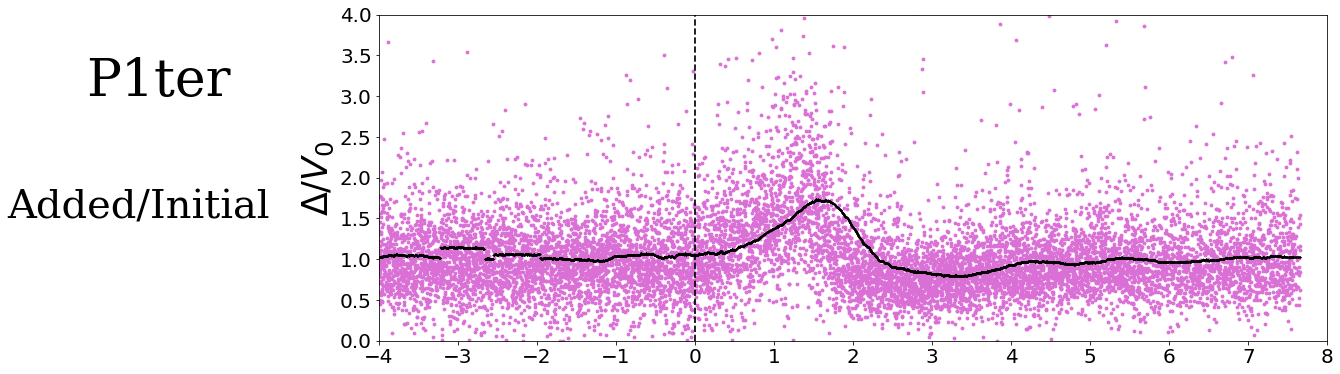

In [ ]:
AddedVolume_IniVolum1_model = data_model[['cell', 't']]
AddedVolume_IniVolum1_model['AddedVolume to Initial'] = data_model.apply(lambda x: ( x['xf'] - x['x0'])/x['x0'], axis=1)
AddedVolume_IniVolum_Plot1_model = AddedVolume_IniVolum1_model.pivot_table('AddedVolume to Initial', index='t', columns='cell', aggfunc='mean',margins=True)
AddedVolume_IniVolum_Plot1_model = AddedVolume_IniVolum_Plot1_model.fillna(0)

AddedVolume_IniVolum_Plot1_model = AddedVolume_IniVolum_Plot1_model['All']
AddedVolume_IniVolum_Plot1_model = pd.DataFrame(AddedVolume_IniVolum_Plot1_model)
AddedVolume_IniVolum_Plot1_model = AddedVolume_IniVolum_Plot1_model.reset_index()
AddedVolume_IniVolum_Plot1_model = AddedVolume_IniVolum_Plot1_model[:-1]

AddedVolume_IniVolum_Plot1_model['Rolling Average'] = AddedVolume_IniVolum_Plot1_model['All'].rolling(500, min_periods=1).mean()

#Plot
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=6,color='k',  ls='--',lw = 1.7)
plt.scatter(AddedVolume_IniVolum_Plot1['t1Trans']/60, AddedVolume_IniVolum_Plot1['All'],s=8, color='orchid')
plt.plot(AddedVolume_IniVolum_Plot1['t1Trans']/60, AddedVolume_IniVolum_Plot1['Rolling Average'], '.', color='k', markersize=1.1)
plt.plot(AddedVolume_IniVolum_Plot1_model['t']/60, AddedVolume_IniVolum_Plot1_model['Rolling Average'], ls=" ", color="k",marker= 'o', markersize= 15,markerfacecolor="w", alpha=0.98,ms=10,markevery=300)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\Delta /V_0$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.xlim(-4,8)
plt.ylim(0,4)
plt.text(-8.7, 1.5, r'Added/Initial',family="serif", fontsize=40)
plt.text(-7.7, 3, r'P1ter',family="serif", fontsize=52)
plt.savefig(f"{images_dir_model}/AddedToInitialVolumenModelP5ori.png", bbox_inches = "tight", dpi=300)

## **Growth rate**

In [ ]:
GrowthRate_model = data_model[['cell', 't', 'alpha']]
GrowthRate_Plot_model = GrowthRate_model.pivot_table('alpha', index='t', columns='cell', aggfunc='mean',margins=True)
GrowthRate_Plot_model = GrowthRate_Plot_model.fillna(0)

GrowthRate_Plot_model = GrowthRate_Plot_model['All']
GrowthRate_Plot_model = pd.DataFrame(GrowthRate_Plot_model)
GrowthRate_Plot_model = GrowthRate_Plot_model.reset_index()
GrowthRate_Plot_model = GrowthRate_Plot_model[:-1]

GrowthRate_Plot_model['Rolling Average']= GrowthRate_Plot_model['All'].rolling(900, min_periods=1).mean()

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=0.04,color='k',  ls='--',lw = 1.7)
plt.scatter(GrowthRate_Plot['t1Trans']/60, GrowthRate_Plot['All'], s=10, color='coral')
plt.plot(GrowthRate_Plot['t1Trans']/60, GrowthRate_Plot['Rolling Average'], '-', color='k', markersize=2)
plt.plot(GrowthRate_Plot_model['t']/60, GrowthRate_Plot_model['Rolling Average'], ls=" ", color="k",marker= 'o', markersize= 13,markerfacecolor="w", alpha=1,ms=10,markevery=300)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\alpha ~(min^{-1})$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 8, 1))
plt.xlim(-4,8)
plt.text(-8.7, 0.015, r'Growth Rate ',family="serif", fontsize=40)
plt.text(-7.7, 0.03, r'P1ter',family="serif", fontsize=52)
plt.ylim(-0.001,0.035)
plt.savefig(f"{images_dir_model}/GrowthRateModelP5ori.png", bbox_inches = "tight", dpi=300)

KeyError: ignored

## **Zeta**

In [ ]:
#Fitting function
def func(x, a, b):
    return a*x+b

import numpy as np
from scipy.optimize import curve_fit

zeta_model = np.array([])
t = data_model['t'].min()
initialGuess = [1,1]
increment = 60
iterations = 2000/increment
for i in range(int(iterations)):
  zeta_t = data_model[(data_model['t']>t) & (data_model['t']<(t+increment))]
  Division_Control = zeta_t[['cell','t','x0']]
  #Division_Control['Added_size2'] = zeta_t.apply(lambda x: x[' x0']*(np.exp(x[' alpha']*x['divT'])-1), axis =1)
  Division_Control_Plot = zeta_t.pivot_table('Added_size', index='cell', columns='x0', aggfunc='mean',margins=True)
  Division_Control_Plot = Division_Control_Plot.fillna(0)
  D= Division_Control_Plot.reset_index()
  D= D.iloc[-1: ].T
  D= D.drop(index='All')
  D= D.reset_index(['x0'])
  l = len(Division_Control_Plot)-1
  D= D[1:]
  popt1, pcov1 = curve_fit(func, D['x0'], D[l], initialGuess)
  popt1 =np.append(popt1,[t], axis =0)
  zeta_model = np.append(zeta_model,popt1, axis = 0) 
  t = t + increment

print(zeta_model)
zeta_model = pd.DataFrame(zeta_model.reshape(int(iterations),3))
print(zeta_model)
rolling_model = zeta_model[0].rolling(6, min_periods=1).mean()

import numpy as np
m= rolling_model.mean()
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=-1.5, ymax=1.5,color='k',  ls='--',lw = 1.7)
plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$\zeta$', family="serif", fontsize = 35)
ax.vlines(0, ymin=-1.5, ymax=1.5,color='k',  ls='--',lw = 2)
ax.hlines(1, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
ax.hlines(-1, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
ax.hlines(0, xmin= -4, xmax= 9, color = 'darkgray', ls= '--', lw=1.7)
#plt.plot(zeta_model[2]/60, zeta_model[0], '.',color = 'Darkseagreen',)
plt.plot(zeta[2]/60, rolling,'-',color = 'k',lw = 2.5)
plt.plot(zeta_model[2]/60, rolling_model, ls=" ", color="k",marker= 'o', markersize= 15,markerfacecolor="w", alpha=1,ms=10,markevery=1)
plt.plot(zeta[2]/60, zeta[0], '.',color = 'gray',marker= 'o', markersize= 15,markerfacecolor="gray",alpha = 1, ms=10)
plt.text(-3, 0.85, r'Timer', fontsize=22, color='gray')
plt.text(-3, 0.05, r'Adder', fontsize=22, color='gray')
plt.text(-3, -0.95, r'Sizer', fontsize=22, color='gray')
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ylim(-1.1,1.1)
plt.xlim(-4,8)
plt.text(-8.7, -.1, r'Division',family="serif", fontsize=40)
plt.text(-7.9, -0.4, r'Control',family="serif", fontsize=40)
plt.text(-7.9, 0.9, r'P1ter',family="serif", fontsize=52)
plt.title(r'$\zeta = {0:.2f} $'.format(m), family= "serif", size = 30)
plt.savefig(f"{images_dir_model}/ZetaControlPlotModelP5ori.png",bbox_inches="tight", dpi=300)

## **Flourescense**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


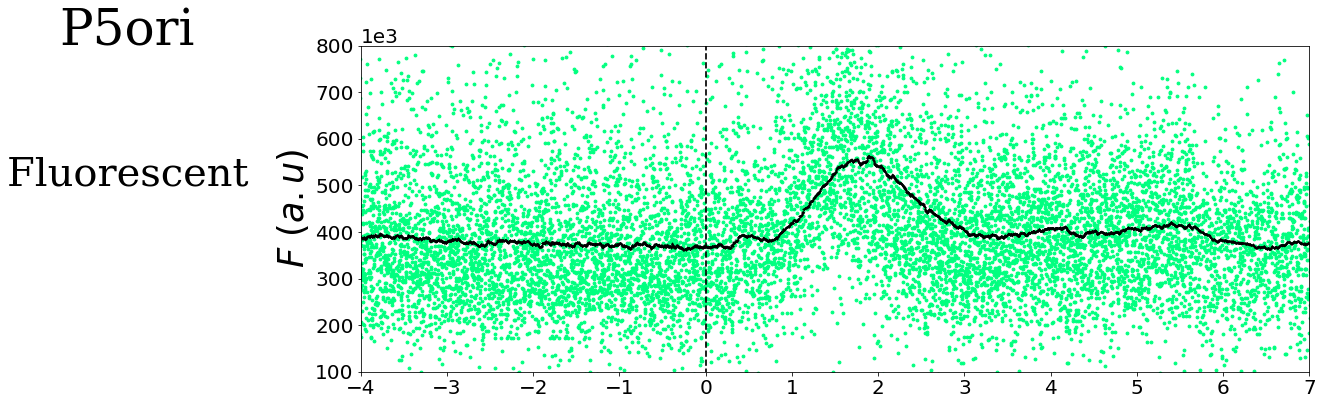

In [2]:
flourescense = df[['fov', 't1Trans']]
flourescense['Absolute fluorescence'] = df.apply(lambda x: abs(x['Itot0'] - x['Itot1']), axis=1)
flourescenseT = flourescense.pivot_table('Absolute fluorescence', index='t1Trans', columns='fov', aggfunc='mean', margins=True)
flourescenseT = flourescenseT.fillna(0)

flourescenseT = flourescenseT['All']
flourescenseT = pd.DataFrame(flourescenseT)
flourescenseT= flourescenseT.reset_index(['t1Trans'])
flourescenseT= flourescenseT[:-1]

#Rolling average
flourescenseT['Rolling average'] = flourescenseT['All'].ewm(span=500).mean()

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=5000000, ymax=6,color='k',  ls='--',lw = 1.7)
plt.scatter(flourescenseT['t1Trans']/60, flourescenseT['All'], color='springgreen', s= 8)
plt.plot(flourescenseT['t1Trans']/60, flourescenseT['Rolling average'],'.', color='k', markersize=1.1)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$F~(a.u)$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ticklabel_format(axis="y", style="sci", scilimits=(3,3))
plt.ylim(100000,800000)
plt.xlim(-4,7)
plt.text(-8.1, 500000, r'Fluorescent ',family="serif", fontsize=40)
plt.text(-7.5, 800000, r'P5ori',family="serif", fontsize=50)
#plt.title('P5ori', fontsize = 30, family = 'sarif')
plt.savefig(f"{images_dir}/FlourescenseP5ori.png", bbox_inches="tight", dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


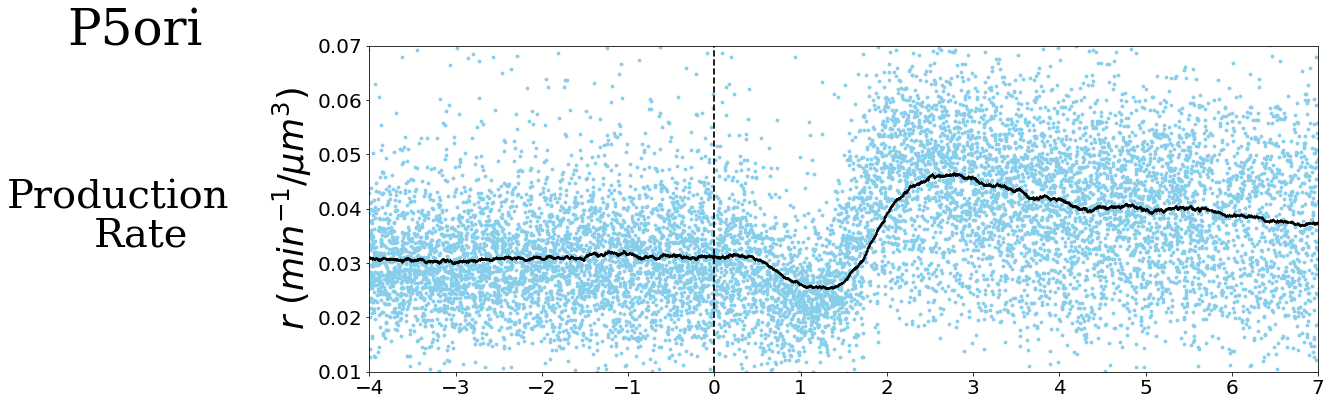

In [3]:
Rate = df[['fov', 't1Trans']]
Rate['Absolute fluorescence'] = df.apply(lambda x: abs(x['Itot0'] - x['Itot1'])/(abs(x['t0Trans'] - x['t1Trans'])*x['V1']), axis=1)
RateT = Rate.pivot_table('Absolute fluorescence', index='t1Trans', columns='fov', aggfunc='mean', margins=True)
RateT = RateT.fillna(0)
RateT = RateT['All']
RateT = pd.DataFrame(RateT)
RateT= RateT.reset_index(['t1Trans'])
RateT= RateT[:-1]

#Rolling average
RateT['Rolling average'] = RateT['All'].ewm(span=500).mean()

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=0.07,color='k',  ls='--',lw = 1.7)
plt.scatter(RateT['t1Trans']/60, RateT['All']/100000, color='skyblue', s= 8)
plt.plot(RateT['t1Trans']/60, RateT['Rolling average']/100000, '.', color='k', markersize=1.1)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 20)
plt.ylabel(r'$r~(min^{-1}/\mu m^{3})$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ylim(0.01,0.07)
plt.xlim(-4,7)
plt.text(-7.5, 0.07, r'P5ori',family="serif", fontsize=50)
plt.text(-8.2, 0.04, r'Production',family="serif", fontsize=40)
plt.text(-7.2, 0.033, r'Rate',family="serif", fontsize=40)
plt.savefig(f"{images_dir}/RateP5ori.png", bbox_inches = "tight", dpi=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


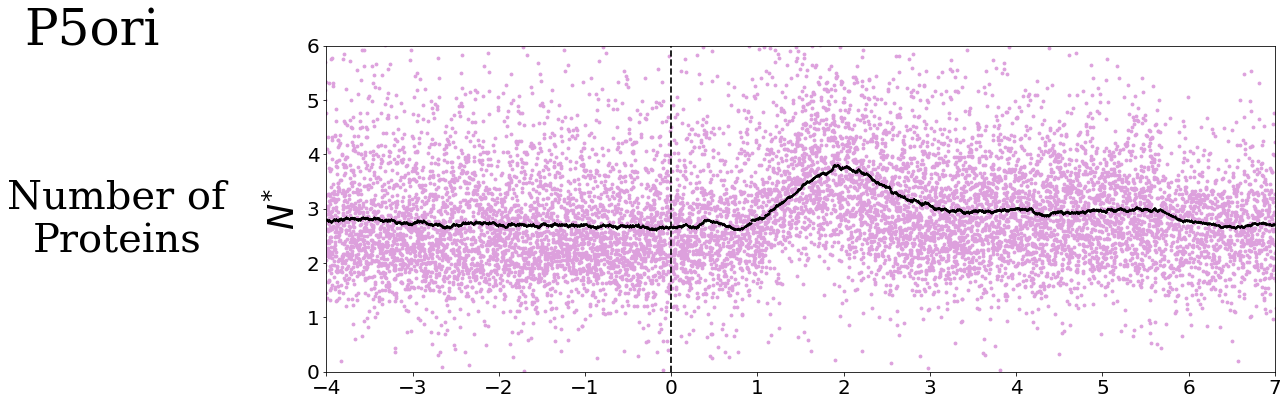

In [4]:
Proteins = df[['fov', 't1Trans']]
#Proteins['Absolute fluorescence'] = df.apply(lambda x: (abs(x['Itot0'] - x['Itot1'])/(abs(x['t0Trans'] - x['t1Trans'])*x['V1']))*abs(x['V1'] - x['V0'])/x['expfitBL2'], axis=1)
Proteins['Protein'] = df.apply(lambda x: (abs(x['Itot0'] - x['Itot1'])/(abs(x['t0Trans'] - x['t1Trans'])*x['V1']*x['expfitBV2']))*abs(x['V1'] - x['V0']), axis=1)

ProteinsT = Proteins.pivot_table('Protein', index='t1Trans', columns='fov', aggfunc='mean', margins=True)
ProteinsT = ProteinsT.fillna(0)

ProteinsT = ProteinsT['All']
ProteinsT = pd.DataFrame(ProteinsT)
ProteinsT= ProteinsT.reset_index(['t1Trans'])
ProteinsT= ProteinsT[:-1]
ProteinsT = ProteinsT[ProteinsT['All']>0]
#Rolling average
ProteinsT['Rolling average'] = ProteinsT['All'].ewm(span=500).mean()

plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
fig = plt.figure(figsize=(17,6))
ax = plt.subplot()
ax.vlines(0, ymin=0, ymax=10,color='k',  ls='--',lw = 1.7)
plt.scatter(ProteinsT['t1Trans']/60, ProteinsT['All']/100000, color='plum', s= 8)
plt.plot(ProteinsT['t1Trans']/60, ProteinsT['Rolling average']/100000, '.', color='k', markersize=1.1)
#plt.xlabel(r'Time (h)', family="serif",fontsize = 35)
plt.ylabel(r'$N^{*}$', family="serif", fontsize = 35)
ax.xaxis.set_ticks(np.arange(-4, 9, 1))
plt.ylim(0,6)
plt.xlim(-4,7)
plt.text(-7.5, 6, r'P5ori',family="serif", fontsize=50)
plt.text(-7.7, 3, r'Number of',family="serif", fontsize=40)
plt.text(-7.4, 2.2, r'Proteins',family="serif", fontsize=40)
plt.savefig(f"{images_dir}/NumberOfProteinsP5ori.png", bbox_inches = "tight", dpi=100)